In [1]:
!pip install pyspark

# Initialize Spark Session

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("HCHO Data Analysis") \
    .getOrCreate()
    
spark


# Load the Data

In [4]:
col_mat_nuw_df = spark.read.csv('Dataset/col_mat_nuw_output.csv', header=None, inferSchema=True)
col_mat_nuw_df.show()

+--------------------+--------------+----------+----------+
|                 _c0|           _c1|       _c2|       _c3|
+--------------------+--------------+----------+----------+
|1.969834395781014...|Colombo Proper|2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|2019-01-12|2019-01-13|
|                NULL|Colombo Proper|2019-01-13|2019-01-14|
|1.336291906862603...|Colombo Proper|201

In [5]:
col_mat_nuw_df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [6]:
mon_kur_jaf_df = spark.read.csv('Dataset/mon_kur_jaf_output.csv', header=None, inferSchema=True)
mon_kur_jaf_df.show()

+--------------------+------------------+----------+----------+
|                 _c0|               _c1|       _c2|       _c3|
+--------------------+------------------+----------+----------+
|                NULL|Bibile, Monaragala|2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|2019-01-12|2019-01-13|
|                NULL|Bibile, Monaragala

In [7]:
mon_kur_jaf_df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



In [8]:
kan_df = spark.read.csv('Dataset/kan_output.csv', header=None, inferSchema=True)
kan_df.show()

+--------------------+------------+----------+----------+
|                 _c0|         _c1|       _c2|       _c3|
+--------------------+------------+----------+----------+
|1.760713459877335...|Kandy Proper|2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|2019-01-02|2019-01-03|
|                NULL|Kandy Proper|2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|2019-01-12|2019-01-13|
|                NULL|Kandy Proper|2019-01-13|2019-01-14|
|                NULL|Kandy Proper|2019-01-14|2019-01-15|
| 9.6363963467

In [9]:
kan_df.printSchema()

root
 |-- _c0: double (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: date (nullable = true)
 |-- _c3: date (nullable = true)



## Changing Header Names

In [10]:
column_names = ['HCHO', 'Location', 'Current date', 'Next date']

In [11]:
for i, new_name in enumerate(column_names):
    col_mat_nuw_df = col_mat_nuw_df.withColumnRenamed(col_mat_nuw_df.columns[i], new_name)

col_mat_nuw_df.show()

+--------------------+--------------+------------+----------+
|                HCHO|      Location|Current date| Next date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

In [12]:
for i, new_name in enumerate(column_names):
    mon_kur_jaf_df = mon_kur_jaf_df.withColumnRenamed(mon_kur_jaf_df.columns[i], new_name)

mon_kur_jaf_df.show()

+--------------------+------------------+------------+----------+
|                HCHO|          Location|Current date| Next date|
+--------------------+------------------+------------+----------+
|                NULL|Bibile, Monaragala|  2019-01-01|2019-01-02|
|1.919914652467399E-5|Bibile, Monaragala|  2019-01-02|2019-01-03|
|2.811447935930283...|Bibile, Monaragala|  2019-01-03|2019-01-04|
|3.747998184385943E-5|Bibile, Monaragala|  2019-01-04|2019-01-05|
|-1.79826087934531...|Bibile, Monaragala|  2019-01-05|2019-01-06|
|1.457836896179902...|Bibile, Monaragala|  2019-01-06|2019-01-07|
|2.828590802546534...|Bibile, Monaragala|  2019-01-07|2019-01-08|
|                NULL|Bibile, Monaragala|  2019-01-08|2019-01-09|
|1.420850167050957...|Bibile, Monaragala|  2019-01-09|2019-01-10|
|                NULL|Bibile, Monaragala|  2019-01-10|2019-01-11|
|2.014587947072581E-5|Bibile, Monaragala|  2019-01-11|2019-01-12|
|1.582787663210183...|Bibile, Monaragala|  2019-01-12|2019-01-13|
|         

In [13]:
for i, new_name in enumerate(column_names):
    kan_df = kan_df.withColumnRenamed(kan_df.columns[i], new_name)

kan_df.show()

+--------------------+------------+------------+----------+
|                HCHO|    Location|Current date| Next date|
+--------------------+------------+------------+----------+
|1.760713459877335...|Kandy Proper|  2019-01-01|2019-01-02|
|9.220391253917748E-5|Kandy Proper|  2019-01-02|2019-01-03|
|                NULL|Kandy Proper|  2019-01-03|2019-01-04|
|1.908681983853839...|Kandy Proper|  2019-01-04|2019-01-05|
|1.219517840206744...|Kandy Proper|  2019-01-05|2019-01-06|
|-6.51408612938880...|Kandy Proper|  2019-01-06|2019-01-07|
|  1.6323820639265E-4|Kandy Proper|  2019-01-07|2019-01-08|
|-6.73520553391426...|Kandy Proper|  2019-01-08|2019-01-09|
|1.279693658243135...|Kandy Proper|  2019-01-09|2019-01-10|
|4.546048424126012E-5|Kandy Proper|  2019-01-10|2019-01-11|
|3.600074175192105E-5|Kandy Proper|  2019-01-11|2019-01-12|
|1.286629698010177E-4|Kandy Proper|  2019-01-12|2019-01-13|
|                NULL|Kandy Proper|  2019-01-13|2019-01-14|
|                NULL|Kandy Proper|  201

## Merge Datasets

In [14]:
combined_df = col_mat_nuw_df.union(mon_kur_jaf_df).union(kan_df)


In [15]:
num_rows = combined_df.count()
num_cols = len(combined_df.columns)

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")


Number of rows: 12782
Number of columns: 4


In [16]:
combined_df.describe().show()

+-------+--------------------+-------------------+
|summary|                HCHO|           Location|
+-------+--------------------+-------------------+
|  count|                7918|              12782|
|   mean|1.192778916513748...|               NULL|
| stddev|9.322341209771851E-5|               NULL|
|    min|-3.52473024357239...| Bibile, Monaragala|
|    max|8.997101837438971E-4|Nuwara Eliya Proper|
+-------+--------------------+-------------------+



In [17]:
combined_df.show()

+--------------------+--------------+------------+----------+
|                HCHO|      Location|Current date| Next date|
+--------------------+--------------+------------+----------+
|1.969834395781014...|Colombo Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|Colombo Proper|  2019-01-02|2019-01-03|
|9.852118897938794E-5|Colombo Proper|  2019-01-03|2019-01-04|
|2.099320518114242E-4|Colombo Proper|  2019-01-04|2019-01-05|
|1.785337298892930...|Colombo Proper|  2019-01-05|2019-01-06|
|1.082296700235670...|Colombo Proper|  2019-01-06|2019-01-07|
|3.926829280477309...|Colombo Proper|  2019-01-07|2019-01-08|
|9.153156350685351E-5|Colombo Proper|  2019-01-08|2019-01-09|
|1.205978992853015...|Colombo Proper|  2019-01-09|2019-01-10|
|1.297723562983258...|Colombo Proper|  2019-01-10|2019-01-11|
|2.239188166801278...|Colombo Proper|  2019-01-11|2019-01-12|
|1.569418094178759...|Colombo Proper|  2019-01-12|2019-01-13|
|                NULL|Colombo Proper|  2019-01-13|2019-01-14|
|1.33629

# Cleaning the data

## Duplicates

In [18]:
total_rows = combined_df.count()
distinct_rows = combined_df.distinct().count()

print(f"Total rows: {total_rows}")
print(f"Distinct rows: {distinct_rows}")
if total_rows > distinct_rows:
    print("There are duplicates in the DataFrame.")
else:
    print("No duplicates found.")


Total rows: 12782
Distinct rows: 12782
No duplicates found.


## Null values

In [19]:
from pyspark.sql.functions import col, count, when, isnull

null_counts = combined_df.select([count(when(isnull(c), c)).alias(c) for c in combined_df.columns])
null_counts.show()


+----+--------+------------+---------+
|HCHO|Location|Current date|Next date|
+----+--------+------------+---------+
|4864|       0|           0|        0|
+----+--------+------------+---------+



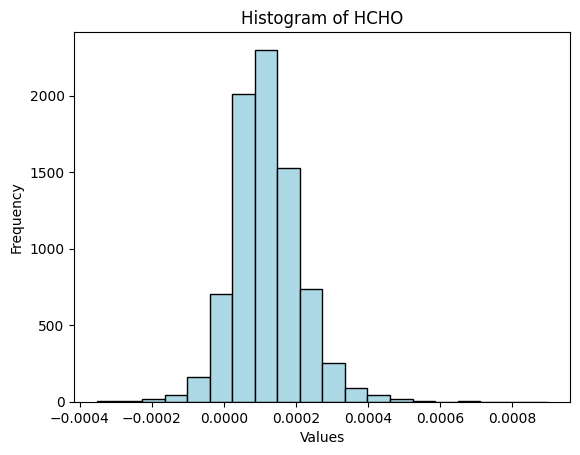

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

pandas_df = combined_df.toPandas()

plt.hist(pandas_df['HCHO'], bins=20, color='lightblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO')


plt.show()


In [25]:
from pyspark.sql import Window
from pyspark.sql.functions import col, lag, coalesce, lead

null_hcho_counts = combined_df.filter(col("HCHO").isNull()).count()

# continue until there are no nulls left
while null_hcho_counts > 0:
    # window specs
    backward_windowSpec = Window.orderBy("Current Date")
    forward_windowSpec = Window.orderBy("Current Date")
    
    #using lag to carry last observation forward
    previous_value = lag("HCHO", 1).over(backward_windowSpec)
    combined_df = combined_df.withColumn("HCHO", coalesce("HCHO", previous_value))
    
    # using lead to carry next observation backward
    next_value = lead("HCHO", 1).over(forward_windowSpec)
    combined_df = combined_df.withColumn("HCHO", coalesce("HCHO", next_value))
    
    #updating null counts
    null_hcho_counts = combined_df.filter(col("HCHO").isNull()).count()
    

In [26]:
null_counts = combined_df.select([count(when(isnull(c), c)).alias(c) for c in combined_df.columns])
null_counts.show()

+----+--------+------------+---------+
|HCHO|Location|Current date|Next date|
+----+--------+------------+---------+
|   0|       0|           0|        0|
+----+--------+------------+---------+



In [27]:
combined_df.show()

+--------------------+-------------------+------------+----------+
|                HCHO|           Location|Current date| Next date|
+--------------------+-------------------+------------+----------+
|1.969834395781014...|     Colombo Proper|  2019-01-01|2019-01-02|
|1.969834395781014...|   Deniyaya, Matara|  2019-01-01|2019-01-02|
|1.969834395781014...|Nuwara Eliya Proper|  2019-01-01|2019-01-02|
|8.829725542537962E-5| Bibile, Monaragala|  2019-01-01|2019-01-02|
|8.829725542537962E-5|  Kurunegala Proper|  2019-01-01|2019-01-02|
|5.830909719406619E-5|      Jaffna Proper|  2019-01-01|2019-01-02|
|1.760713459877335...|       Kandy Proper|  2019-01-01|2019-01-02|
|2.625522171968594...|     Colombo Proper|  2019-01-02|2019-01-03|
|5.803530712000793E-6|   Deniyaya, Matara|  2019-01-02|2019-01-03|
|5.803530712000793E-6|Nuwara Eliya Proper|  2019-01-02|2019-01-03|
|1.919914652467399E-5| Bibile, Monaragala|  2019-01-02|2019-01-03|
|1.370787402778218...|  Kurunegala Proper|  2019-01-02|2019-01

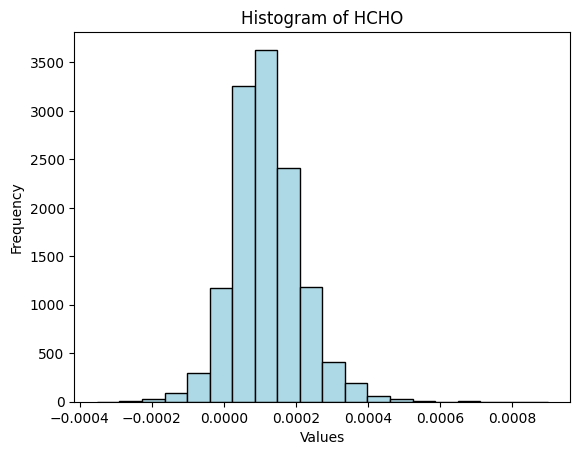

In [28]:
pandas_df = combined_df.toPandas()

plt.hist(pandas_df['HCHO'], bins=20, color='lightblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of HCHO')


plt.show()